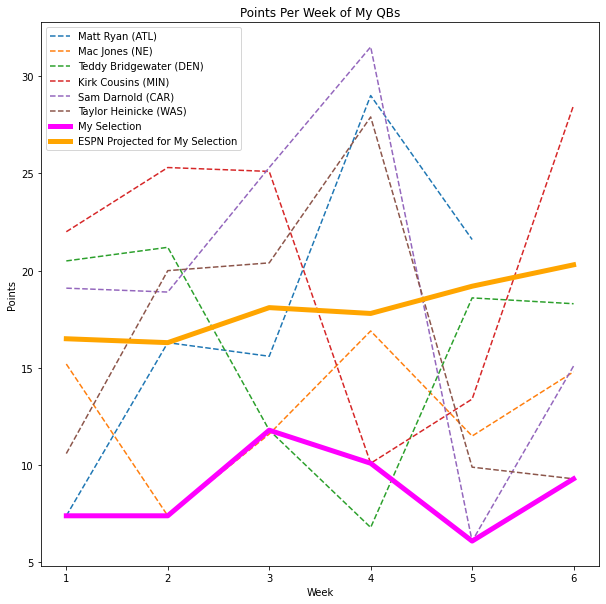

In [1]:
from getPlayerStats import getPlayerStats
import matplotlib.pyplot as plt
import numpy as np

wk = 6
stats = getPlayerStats(wk)
players = ['Matt Ryan (ATL)', 'Mac Jones (NE)', 'Teddy Bridgewater (DEN)', 'Kirk Cousins (MIN)', 'Sam Darnold (CAR)', 'Taylor Heinicke (WAS)']
resultPoints = []
plt.rcParams["figure.figsize"] = (10, 10)
plt.xticks(np.arange(wk), np.arange(1, wk+1))
plt.ylabel('Points')
plt.xlabel('Week')
plt.title('Points Per Week of My QBs')

z = 0
for i in players:
    ppoints = []
    for j in range(wk):
        if stats[i][j][0] == 0:
            ppoints.append([None])
        else:
            ppoints.append(stats[i][j])
    resultPoints.append(stats[i][z])
    plt.plot(ppoints, '--', label=i)
    z += 1
espnProj = [16.5, 16.3, 18.1, 17.8, 19.2, 20.3]
plt.plot(resultPoints, label='My Selection', color='magenta', linewidth=5)
plt.plot(espnProj, label='ESPN Projected for My Selection', color='orange', linewidth=5)
plt.legend()
plt.show()

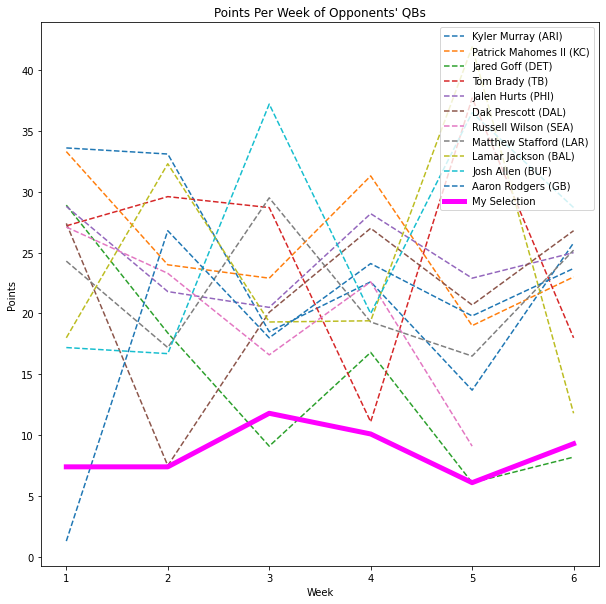

In [2]:

plt.clf()

oplayers = ["Kyler Murray (ARI)", "Patrick Mahomes II (KC)", "Jared Goff (DET)", "Tom Brady (TB)", "Jalen Hurts (PHI)", "Dak Prescott (DAL)", "Russell Wilson (SEA)", "Matthew Stafford (LAR)", "Lamar Jackson (BAL)", "Josh Allen (BUF)", "Aaron Rodgers (GB)"]
plt.xticks(np.arange(wk), np.arange(1, wk+1))
plt.ylabel('Points')
plt.xlabel('Week')
plt.title('Points Per Week of Opponents\' QBs')


for i in oplayers:
    ppoints = []
    for j in range(wk):
        if stats[i][j][0] == 0:
            ppoints.append([None])
        else:
            ppoints.append(stats[i][j])
    plt.plot(ppoints, '--', label=i)

plt.plot(resultPoints, label='My Selection', color='magenta', linewidth=5)
plt.legend()
plt.show()

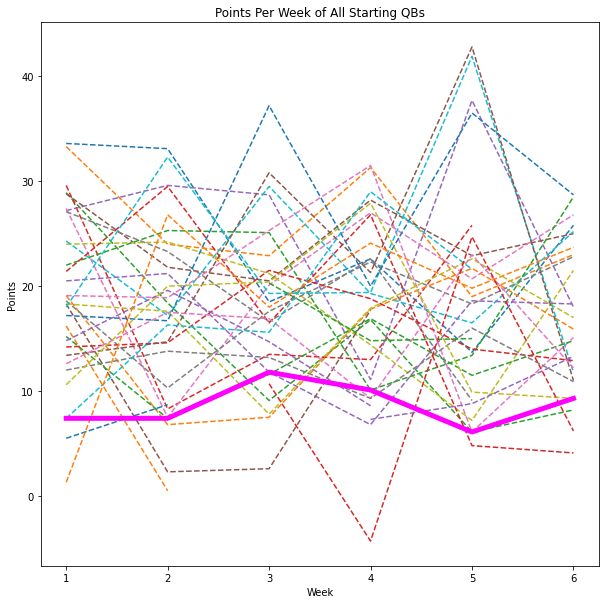

In [3]:

plt.clf()

plt.xticks(np.arange(wk), np.arange(1, wk+1))
plt.ylabel('Points')
plt.xlabel('Week')
plt.title('Points Per Week of All Starting QBs')

for i in stats.keys():
    ppoints = []
    for j in range(wk):
        if stats[i][j][0] == 0:
            ppoints.append([None])
        else:
            ppoints.append(stats[i][j])
    plt.plot(ppoints, '--', label=i)
plt.plot(resultPoints, label='My Selection', color='magenta', linewidth=5)
plt.show()

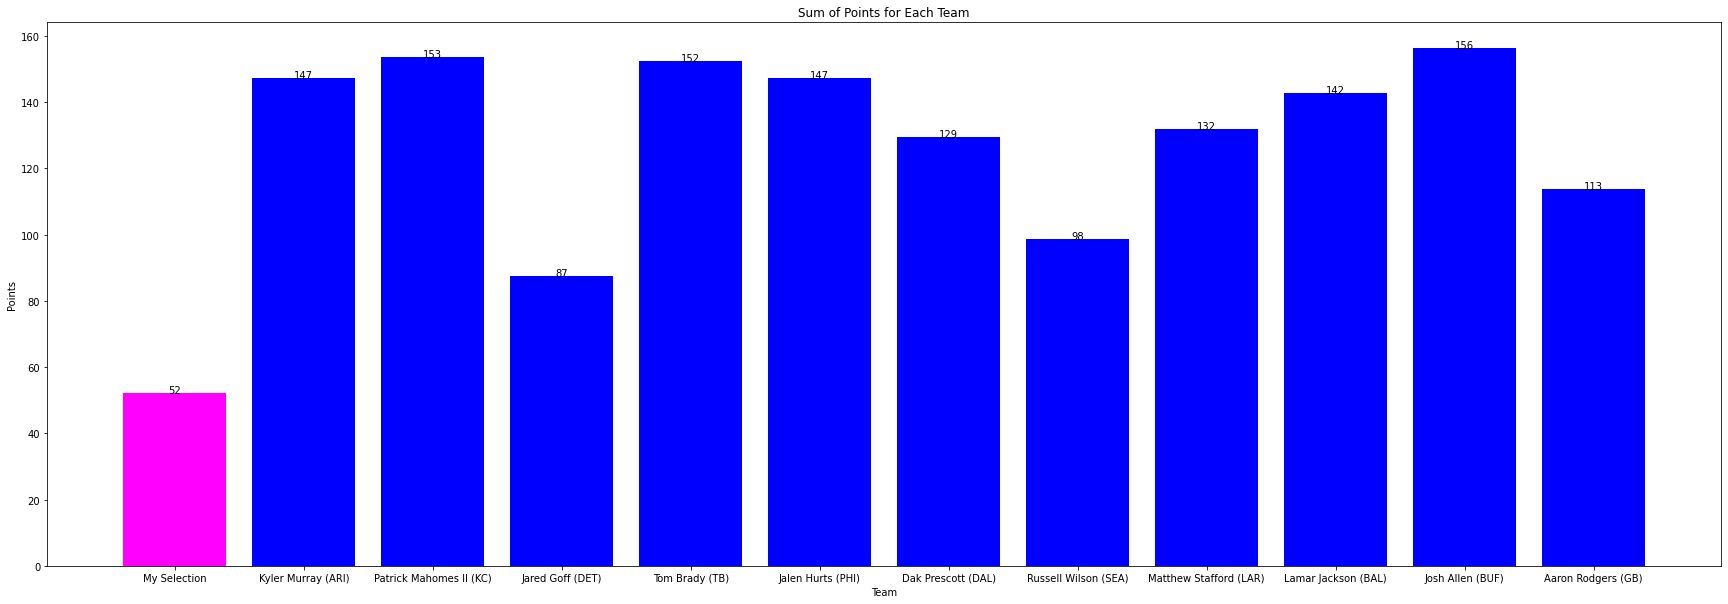

In [53]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.clf()

myTot = 0
z = 0
for i in players:
    myTot += float(stats[i][z][0])
    z += 1

oTot = []
for j in oplayers:
    temp = 0
    for k in range(wk):
        temp += float(stats[j][k][0])
    oTot.append(temp)
    
tName = ['My Selection'] + oplayers
tTot = [myTot]+oTot

plt.bar(tName, tTot, color=['magenta']+['blue']*len(oplayers))
for i in range(len(tName)):
    plt.text(i, tTot[i], int(tTot[i]), ha='center')
plt.ylabel('Points')
plt.xlabel('Team')
plt.title('Sum of Points for Each Team')
plt.show()

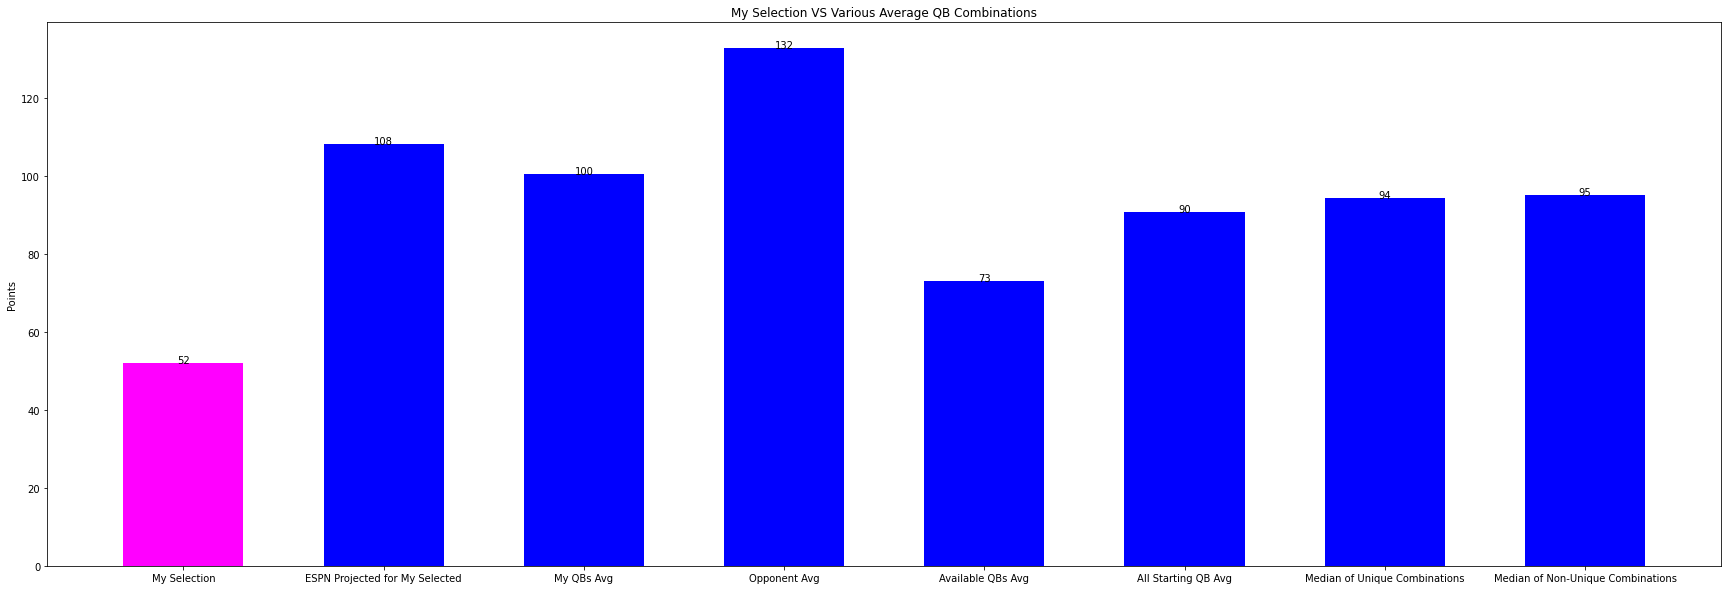

In [18]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.clf()

oAvg = 0
for i in oplayers:
    temp = 0
    for j in range(wk):
        temp += stats[i][j][0]
    oAvg += (temp)
oAvg = oAvg/len(oplayers)

myAvg = 0
for i in players:
    temp = 0
    for j in range(wk):
        temp += stats[i][j][0]
    myAvg += (temp)
myAvg = myAvg/len(players)

allAvg = 0
for i in stats.keys():
    temp = 0
    for j in range(wk):
        temp += stats[i][j][0]
    allAvg += (temp)
allAvg = allAvg/len(stats.keys())

availAvg = 0
for i in (stats.keys() - oplayers):
    temp = 0
    for j in range(wk):
        temp += stats[i][j][0]
    availAvg += (temp)
availAvg = availAvg/len(stats.keys() - oplayers)

projSum = sum(espnProj)

tempX = ['My Selection', 'ESPN Projected for My Selected', 'My QBs Avg', 'Opponent Avg', 'Available QBs Avg', 'All Starting QB Avg', 'Median of Unique Combinations', 'Median of Non-Unique Combinations']
tempY = [myTot, projSum, myAvg, oAvg, availAvg, allAvg, 94.4, 95.2]
plt.bar(tempX, tempY, color=['magenta']+['blue']*(len(tempX)-1), width=.6)
for i in range(len(tempX)):
    plt.text(i, tempY[i], int(tempY[i]), ha='center')
plt.ylabel('Points')
plt.title('My Selection VS Various Average QB Combinations')
plt.show()

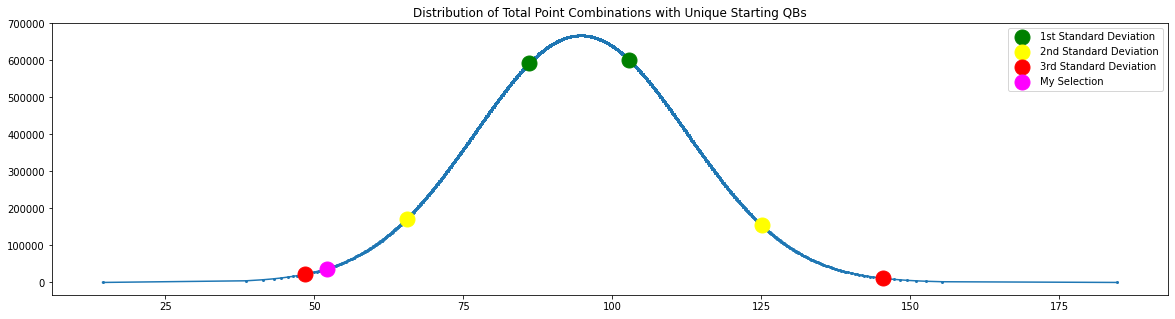

In [6]:
from scipy.stats import norm

plt.rcParams["figure.figsize"] = (20, 5)
plt.clf()

datafile = open('stats\curve.txt', 'r')
data = datafile.read()
data = data.replace('[', '')
data = data.replace(']', '')
data = data.split(',')

for i in range(len(data)):
    data[i] = float(data[i])
    
data.append(184.7)
    
dmean = np.mean(data)

y = norm.pdf(data, dmean, np.std(data))*29684354

xTarget = 52.1
s1 = [86.1, 102.9]
s2 = [65.5, 125.1]
s3 = [48.4, 145.4]

yTarget = norm.pdf(52.1, dmean, np.std(data))*29684354
yTarget1 = norm.pdf(s1, dmean, np.std(data))*29684354
yTarget2 = norm.pdf(s2, dmean, np.std(data))*29684354
yTarget3 = norm.pdf(s3, dmean, np.std(data))*29684354

plt.plot(data, y, '-o', markersize=2)
plt.plot(s1, yTarget1, 'o', color='green', markersize=15, label='1st Standard Deviation')
plt.plot(s2, yTarget2, 'o', color='yellow', markersize=15, label='2nd Standard Deviation')
plt.plot(s3, yTarget3, 'o', color='red', markersize=15, label='3rd Standard Deviation')
plt.plot(xTarget, yTarget, 'o', color='magenta', markersize=15, label='My Selection')
plt.title('Distribution of Total Point Combinations with Unique Starting QBs')
plt.legend()

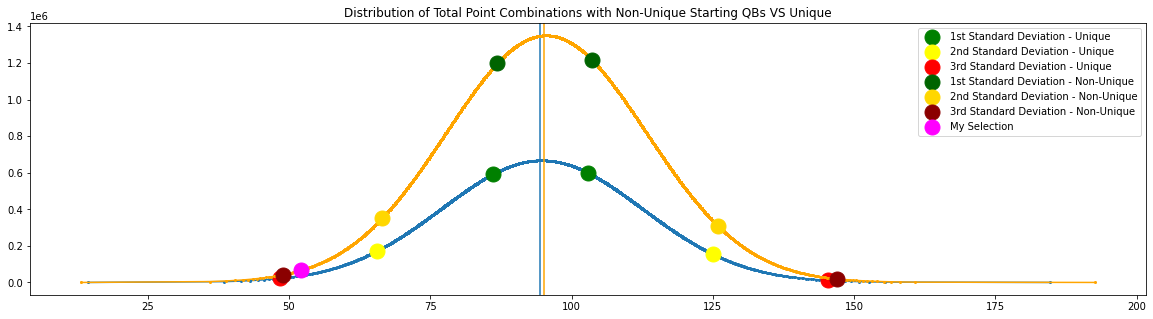

In [17]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.clf()

datafile = open('stats\curve2.txt', 'r')
data2 = datafile.read()
data2 = data2.replace('[', '')
data2 = data2.replace(']', '')
data2 = data2.split(',')

for i in range(len(data2)):
    data2[i] = float(data2[i])
    
data2.append(192.7)
    
dmean2 = np.mean(data2)

y2 = norm.pdf(data2, dmean2, np.std(data2))*59976000

xTarget02 = 52.1
r1 = [86.9, 103.6]
r2 = [66.4, 126]
r3 = [49.0, 147.0]

yTarget02 = norm.pdf(52.1, dmean2, np.std(data2))*59976000
yTarget12 = norm.pdf(r1, dmean2, np.std(data2))*59976000
yTarget22 = norm.pdf(r2, dmean2, np.std(data2))*59976000
yTarget32 = norm.pdf(r3, dmean2, np.std(data2))*59976000

plt.plot(data, y, '-o', markersize=2)
plt.plot(s1, yTarget1, 'o', color='green', markersize=15, label='1st Standard Deviation - Unique')
plt.plot(s2, yTarget2, 'o', color='yellow', markersize=15, label='2nd Standard Deviation - Unique')
plt.plot(s3, yTarget3, 'o', color='red', markersize=15, label='3rd Standard Deviation - Unique')
plt.axvline(x=94.4)

plt.plot(data2, y2, '-o', color='orange', markersize=2)
plt.plot(r1, yTarget12, 'o', color='darkgreen', markersize=15, label='1st Standard Deviation - Non-Unique')
plt.plot(r2, yTarget22, 'o', color='gold', markersize=15, label='2nd Standard Deviation - Non-Unique')
plt.plot(r3, yTarget32, 'o', color='darkred', markersize=15, label='3rd Standard Deviation - Non-Unique')
plt.plot(xTarget02, yTarget02, 'o', color='magenta', markersize=15, label='My Selection')
plt.axvline(x=95.2, color='orange')
plt.title('Distribution of Total Point Combinations with Non-Unique Starting QBs VS Unique')
plt.legend()

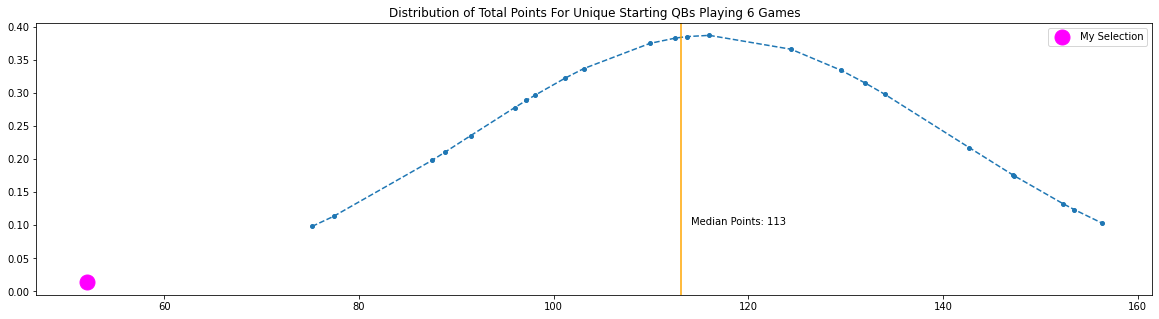

In [52]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.clf()

allTot = []
for i in stats.keys():
    temp = 0
    if  [0] not in stats[i]:
        for j in range(wk):
            temp += stats[i][j][0]
        allTot.append(temp)

allTot = sorted(allTot)
    
dmean = np.mean(allTot)
dmedian = np.median(allTot)

y = norm.pdf(allTot, dmean, np.std(allTot))*len(allTot)

xTarget = 52.1

yTarget = norm.pdf(52.1, dmean, np.std(allTot))*len(allTot)

plt.plot(allTot, y, '--o', markersize=4)
plt.plot(xTarget, yTarget, 'o', color='magenta', markersize=15, label='My Selection')
plt.axvline(x=dmedian, color='orange')
plt.text(x=(dmedian+1), y=0.1, s=('Median Points: '+str(int(dmedian))))
plt.title('Distribution of Total Points For Unique Starting QBs Playing 6 Games')
plt.legend()

In [ ]:
0